In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data Cleaning And Preparation

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [3]:
!wget $data

--2022-07-06 08:35:34--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv’

CreditScoring.csv   100%[===================>] 178.21K  --.-KB/s    in 0.02s   

2022-07-06 08:35:34 (10.6 MB/s) - ‘CreditScoring.csv’ saved [182489/182489]



In [4]:
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [5]:
df = pd.read_csv(data)

In [6]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [8]:
status_value = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_value)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [9]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [10]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [12]:
for c in ['income', 'assets', 'debt']:
  df[c] = df[c].replace(to_replace = 99999999, value=np.nan)
  

In [13]:
df = df[df.status != 'unk'].reset_index(drop = True)

In [14]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 11)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 11)

In [15]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [16]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [17]:
del df_train['status']
del df_val['status']
del df_test['status']

In [18]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


# Decision Trees

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [20]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [21]:
dict_vec = DictVectorizer(sparse = False)
X_train = dict_vec.fit_transform(train_dicts)

In [22]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dict_vec.transform(val_dicts)

In [24]:
y_pred = tree.predict_proba(X_val)[:,1]

In [25]:
roc_auc_score(y_val, y_pred)

0.6627533845147854

In [26]:
y_pred = tree.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)
#overfitting occured

1.0

Avoid Overfitting

In [27]:
act_tree = DecisionTreeClassifier(max_depth = 3)
act_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
y_pred = act_tree.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print('train: ', auc)

y_pred = act_tree.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('val: ', auc)

train:  0.7761016984958594
val:  0.7389079944782155


In [29]:
from sklearn.tree import export_text

In [30]:
print(export_text(act_tree,  feature_names =  dict_vec.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Decision Trees Parameter Tuning

In [31]:
for depth in [1,2,3,4,5,6,10,15,20,None]:
  d_tree = DecisionTreeClassifier(max_depth = depth)
  d_tree.fit(X_train, y_train)

  y_pred = d_tree.predict_proba(X_val)[:,1]
  auc = roc_auc_score(y_val, y_pred)

  print('%4s ==> %3f'%(depth,auc))

   1 ==> 0.605864
   2 ==> 0.668526
   3 ==> 0.738908
   4 ==> 0.761283
   5 ==> 0.766938
   6 ==> 0.759563
  10 ==> 0.698245
  15 ==> 0.685286
  20 ==> 0.664037
None ==> 0.658155


In [46]:
scores = []

for depth in [4,5,6, 7, 10, 15, 20]:
  for sample_num in [1,2,5,10,15,20,100,200,500]:
    d_tree = DecisionTreeClassifier(max_depth = depth, min_samples_leaf= sample_num)
    d_tree.fit(X_train, y_train)

    y_pred = d_tree.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((depth, sample_num, auc))
    #print('(%4s, %3d) ==> %.3f' % (depth, sample_num, auc))

In [47]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,2,0.761283
2,4,5,0.761283
3,4,10,0.761283
4,4,15,0.763726


In [48]:
df_scores.sort_values(by='auc', ascending = False).head()

,max_depth,min_samples_leaf,auc
40,10,15,0.790950
58,20,15,0.786685
49,15,15,0.786642
59,20,20,0.785501
22,6,15,0.785250


In [49]:
df_scores_pivot = df_scores.pivot(index = 'min_samples_leaf', columns = ['max_depth'], values = ['auc'])
df_scores_pivot.round(3)

auc                                          
max_depth            4      5      6      7      10     15     20
min_samples_leaf                                                 
1                 0.761  0.766  0.759  0.735  0.712  0.666  0.663
2                 0.761  0.767  0.751  0.755  0.712  0.673  0.683
5                 0.761  0.768  0.760  0.757  0.731  0.710  0.721
10                0.761  0.762  0.778  0.765  0.764  0.761  0.764
15                0.764  0.772  0.785  0.780  0.791  0.787  0.787
20                0.761  0.774  0.773  0.779  0.785  0.780  0.786
100               0.756  0.763  0.776  0.780  0.780  0.780  0.779
200               0.747  0.759  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680

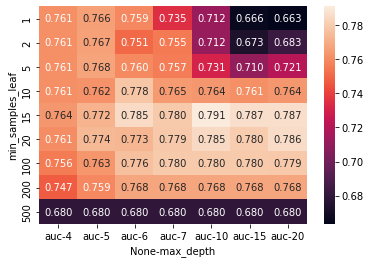

In [50]:
sns.heatmap(df_scores_pivot, annot = True, fmt = '.3f')

In [51]:
last_tree = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 15)
last_tree.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

# Ensembles and Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rand_for = RandomForestClassifier(n_estimators = 10)
rand_for.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [56]:
y_pred = rand_for.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

In [64]:
#rand_for.predict_proba(X_val[[0]])

array([[1., 0.]])

In [67]:
scores = []

for n in range(10, 201, 10):

  rand_for = RandomForestClassifier(n_estimators = n, random_state = 1)
  rand_for.fit(X_train, y_train)

  y_pred = rand_for.predict_proba(X_val)[:,1]
  auc = roc_auc_score(y_val, y_pred)
  scores.append((n , auc))


In [70]:
df_scores = pd.DataFrame(scores, columns = ['n_estimators', 'auc'])

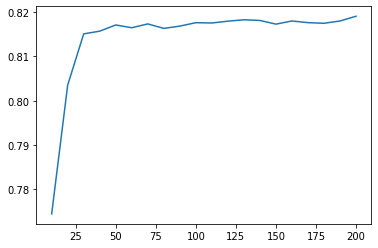

In [72]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [73]:
scores = []

for depth in [5, 10, 15]:
  for n in range(10, 201, 10):

    rand_for = RandomForestClassifier(n_estimators = n, max_depth= depth, random_state = 1)
    rand_for.fit(X_train, y_train)

    y_pred = rand_for.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((depth, n , auc))

In [74]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


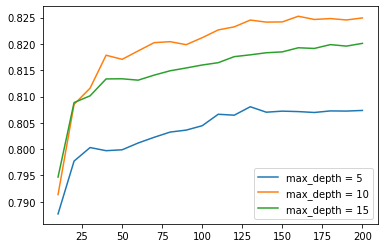

In [76]:
for depth in [5 , 10, 15]:
  df_subset = df_scores[df_scores.max_depth == depth]
  plt.plot(df_subset.n_estimators, df_subset.auc, label = 'max_depth = %d' %depth)

  plt.legend()

In [77]:
max_depth = 10

In [79]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rand_for = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rand_for.fit(X_train, y_train)

        y_pred = rand_for.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [80]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

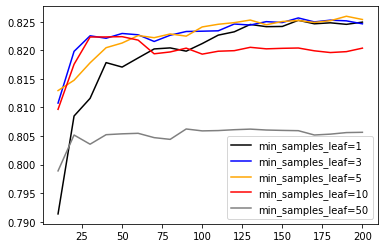

In [81]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [82]:
min_samples_leaf = 3

In [83]:
last_forest = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
last_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

Other useful parametes:

- max_features
- bootstrap

[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

# Gradient Boosting and XGBoost

In [84]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import xgboost as xgb

In [87]:
features = dict_vec.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names = features)
dval = xgb.DMatrix(X_val, label = y_val, feature_names = features)

In [91]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed':1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round = 200)

In [93]:
y_pred = model.predict(dval)

In [94]:
roc_auc_score(y_val, y_pred)

0.8003166549611296

In [99]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [102]:
%%capture output
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread': 8,

    'seed':1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round = 200, verbose_eval = 5, evals=watchlist)

In [103]:
s = output.stdout

In [104]:
print(s)

[0]	train-auc:0.862996	val-auc:0.768179
[5]	train-auc:0.928628	val-auc:0.806056
[10]	train-auc:0.950021	val-auc:0.815577
[15]	train-auc:0.965577	val-auc:0.816803
[20]	train-auc:0.973165	val-auc:0.817748
[25]	train-auc:0.981738	val-auc:0.818783
[30]	train-auc:0.987718	val-auc:0.817875
[35]	train-auc:0.9918	val-auc:0.815096
[40]	train-auc:0.994562	val-auc:0.813873
[45]	train-auc:0.995963	val-auc:0.814624
[50]	train-auc:0.996881	val-auc:0.811282
[55]	train-auc:0.99787	val-auc:0.808739
[60]	train-auc:0.998887	val-auc:0.808006
[65]	train-auc:0.999187	val-auc:0.807509
[70]	train-auc:0.999439	val-auc:0.807316
[75]	train-auc:0.999636	val-auc:0.806922
[80]	train-auc:0.999847	val-auc:0.806771
[85]	train-auc:0.999857	val-auc:0.80671
[90]	train-auc:0.999915	val-auc:0.806371
[95]	train-auc:0.999958	val-auc:0.805802
[100]	train-auc:0.999985	val-auc:0.805076
[105]	train-auc:0.999992	val-auc:0.806032
[110]	train-auc:0.999999	val-auc:0.805269
[115]	train-auc:1	val-auc:0.803822
[120]	train-auc:1	val-auc

In [111]:
def parse_xgb_output(output):
  results = []

  for line in output.stdout.strip().split('\n'):
    it_line, train_line, val_line = line.split('\t')

    it = int(it_line.strip('[]'))
    train = float(train_line.split(':')[1])
    val = float(val_line.split(':')[1])

    results.append((it,train,val))

  columns = ['num_iter', 'train_auc', 'val_auc']
  df_results = pd.DataFrame(results, columns = columns)
  return df_results

In [114]:
df_score = parse_xgb_output(output)

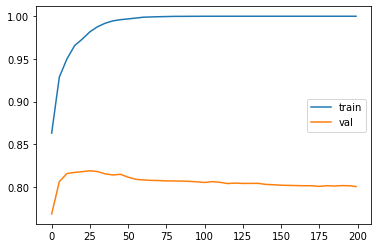

In [115]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()
# overfit occured

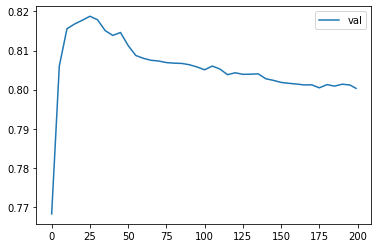

In [116]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

# XGBoost Parameter Tuning

Tuning the following parameters:

- eta
- max_depth
- min_child_weight

In [154]:
scores = {}

In [177]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [178]:
#scores = {}

In [179]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.05'

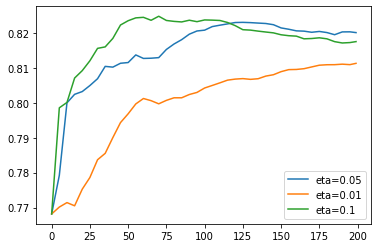

In [181]:
eta_values = ['eta=0.05', 'eta=0.01', 'eta=0.1']

for eta in eta_values:
  df_score = scores[eta]
  plt.plot(df_score.num_iter, df_score.val_auc, label = eta)
plt.legend()

In [182]:
scores = {}

In [191]:
%%capture output
xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [192]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=4'

In [193]:
del scores['max_depth=10']

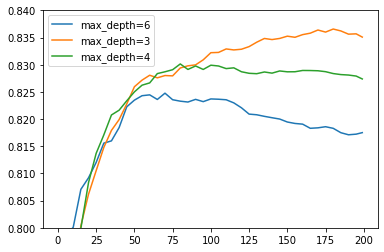

In [194]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend()

In [209]:
scores = {}

In [214]:
%%capture output
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [215]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

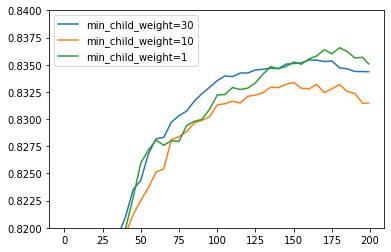

In [216]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.82, 0.84)
plt.legend()

In [208]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

# Selecting the final model

In [217]:
last_tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
last_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [218]:
y_pred = last_tree.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7854738320699426

In [219]:
last_forest = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
last_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [220]:
y_pred = last_forest.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [221]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [222]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8360387251459157

In [223]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = (df_full_train.status == 'default').astype(int).values

In [224]:
del df_full_train['status']

In [225]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [228]:
full_train = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names_out())

test = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out())

In [229]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, full_train, num_boost_round=175)

In [230]:
y_pred = model.predict(test)

In [231]:
roc_auc_score(y_test, y_pred)

0.8322662626460096

# Summary

- Decision trees learn if-then-else rules from data.
- Finding the best split: select the least impure split. This algorithm can overfit, that's why we control it by limiting the max depth and the size of the group.
- Random forest is a way of combininig multiple decision trees. It should have a diverse set of models to make good predictions.
- Gradient boosting trains model sequentially: each model tries to fix errors of the previous model. XGBoost is an implementation of gradient boosting.